# 타이타닉 데이터로 살펴보는 파이썬 실습

관련 데이터는 kaggle의 titanic 데이터를 이용합니다.
(https://www.kaggle.com/c/titanic)

**EDA(Exploratory Data Analysis)**만 진행합니다.  
머신러닝 모델 적용 등은 여기서는 하지 않습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('../datas/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**null 데이터 확인**

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("age null값 비율 : {0:.3f}".format((data['Age'].isna().sum() / len(data)) * 100))
print("cabin null값 비율 : {0:.3f}".format((data['Cabin'].isna().sum() / len(data)) * 100 ))

age null값 비율 : 19.865
cabin null값 비율 : 77.104


**categorical 데이터 분포 확인**

In [6]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

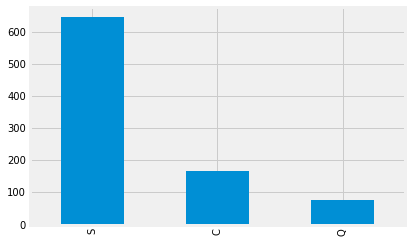

In [7]:
data['Embarked'].value_counts().plot(kind = 'bar')

#컬러가 안나온다면 아래와 같이 컬러 설정도 가능 
#data['Embarked'].value_counts().plot(kind = 'bar', color=['#FF1333', '#000FF3', '#451123'])
#data['Embarked'].value_counts().plot(kind='bar', color=['r', 'g', 'b'])
#data['Embarked'].value_counts().plot(kind='bar', color=[c for c in ['r', 'g', 'b']])

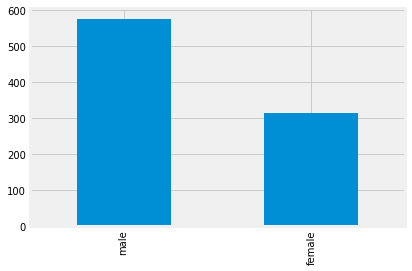

In [8]:
data['Sex'].value_counts().plot(kind='bar')

**또는 seaborn을 이용해서도 시각화가 가능하다**

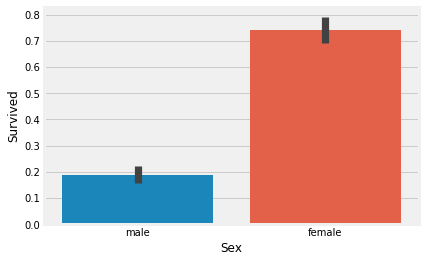

In [9]:
sns.barplot(x = 'Sex', y ='Survived', data=data)

d:\anaconda3\envs\soojin\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


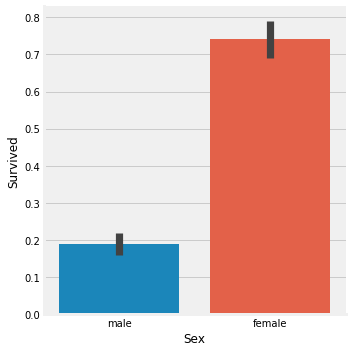

In [10]:
sns.factorplot('Sex', 'Survived', data=data, kind='bar')

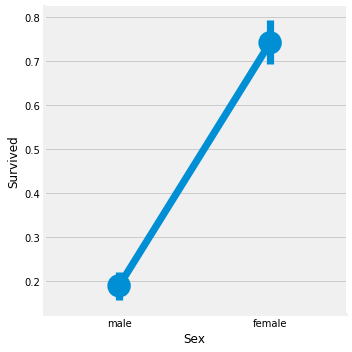

In [11]:
sns.factorplot('Sex', 'Survived', data=data)

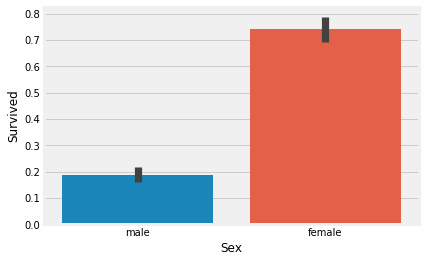

In [12]:
sns.barplot(x='Sex', y='Survived', data=data)

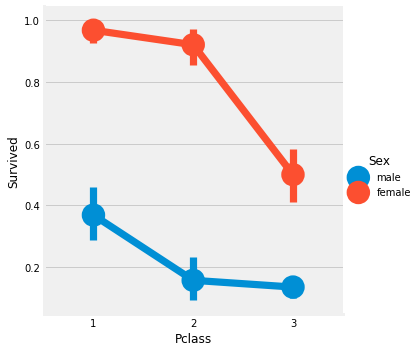

In [13]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

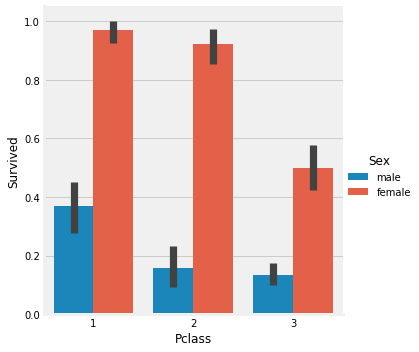

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data, kind='bar')

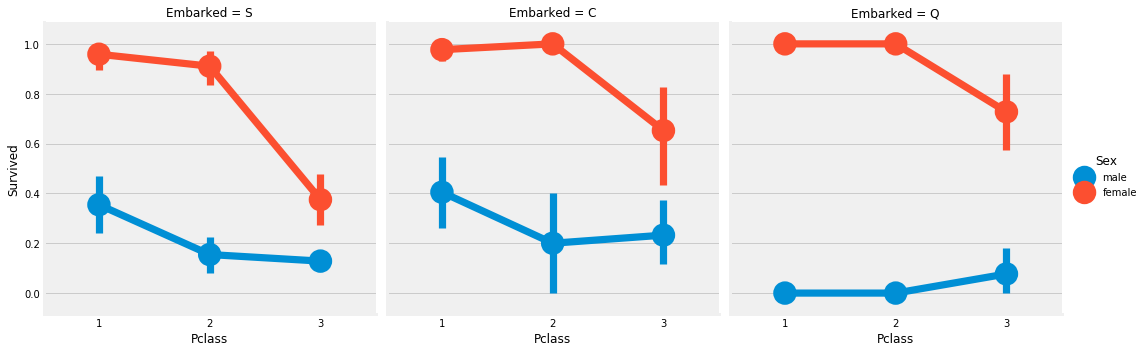

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

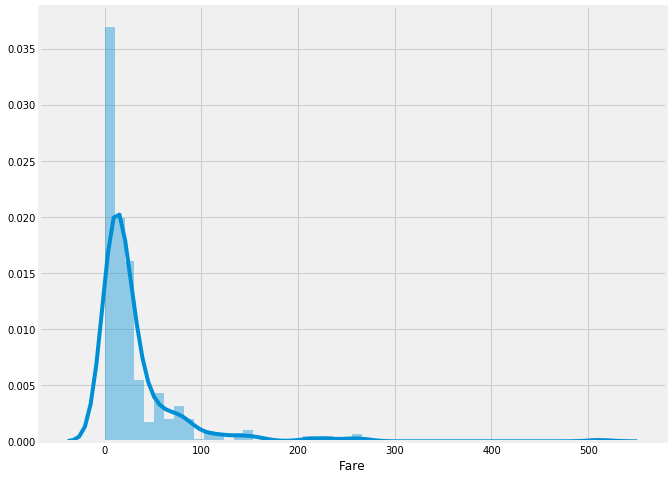

In [16]:
plt.figure(figsize=(10, 8))
sns.distplot(data['Fare'])

**데이터 전처리**

숫자형 범주를 카테고리로, null 데이터 처리 등의 작업을 수행한다.

In [17]:
#Embark는 null 데이터도 몇 없고 대부분 S이므로 S로 넣는다.
data['Embarked'].fillna('S', inplace=True)

#Age는 중앙값으로 넣어도 되지만 다른 방법을 사용해본다.
#data['Age'].fillna(data['Age'].mean(), inplace=True)
#Cabin도 다르게 처리 

In [18]:
data['Embarked'].isnull().sum()

0

이름에서 Mr, Mrs 등의 데이터를 뽑아서 따로 저장한다.

In [19]:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [20]:
data['Initial'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Initial, dtype: object

In [21]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Mme           1
Countess      1
Sir           1
Capt          1
Lady          1
Jonkheer      1
Ms            1
Name: Initial, dtype: int64

In [22]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)



In [23]:
data['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [24]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [25]:
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age' ] = 33
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age' ] = 5
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age' ] = 36
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age' ] = 22
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age' ] = 46

In [26]:
data['Age'].isna().sum()

0

**Age 값 핸들링**

In [27]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [28]:
data['Age_cat'] = data['Age'].apply(lambda x : get_category(x))

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young Adult


**아래와 같이 Age를 핸들링 할 수도 있다.**

In [30]:
data['Age_tmp'] = 0
data.loc[data['Age'] <= 16, 'Age_tmp'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_tmp'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_tmp'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_tmp'] = 3
data.loc[data['Age'] > 64, 'Age_tmp'] = 4

In [31]:
data['Age_tmp'].head()

0    1
1    2
2    1
3    2
4    2
Name: Age_tmp, dtype: int64

참고만 하면 된다.

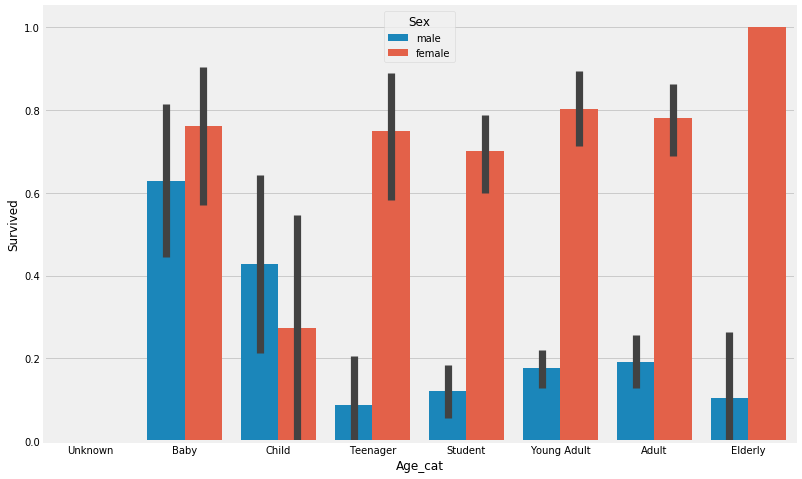

In [32]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=data, order = group_names)

**데이터 매핑**

문자로 되어 있는 categorical 데이터를 각 카테고리에 맞춰 숫자값으로 바꿔준다.

문자는 컴퓨터에서 인식하지 못하기 때문

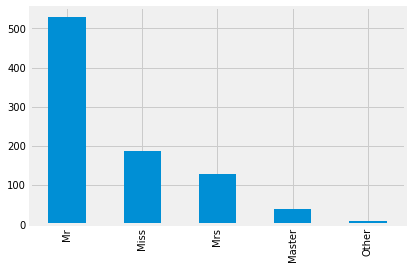

In [33]:
data.Initial.value_counts().plot(kind='bar')

In [34]:
mapping = {
    "Mr":0,
    "Miss":1,
    "Mrs" : 1,
    "Master":2,
    "Other":3
}

data['Initial'] = data['Initial'].map(mapping)

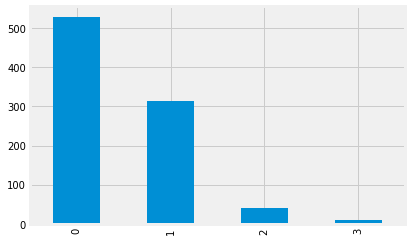

In [35]:
data['Initial'].value_counts().plot(kind='bar')

sklearn의 LabelEncoder를 활용하면 더욱 간단하게 카테고리 데이터를 생성할 수 있다.

In [36]:
def encode_features(data_df):
    features = ['Sex', 'Embarked', 'Age_cat']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    return data_df

In [37]:

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,Age_tmp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult,2


In [38]:
data = encode_features(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,Age_tmp
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,6,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,6,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,6,2


이러한 전처리 작업을 이제 함수화 하자!

In [39]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

def fillna(df):
    df['Fare'].fillna(0, inplace = True)
    df['Embarked'].fillna('S', inplace=True)
    df.loc[ (df['Age'].isnull()) & (df['Initial'] == 'Mr'), 'Age' ] = 33
    df.loc[ (df['Age'].isnull()) & (df['Initial'] == 'Master'), 'Age' ] = 5
    df.loc[ (df['Age'].isnull()) & (df['Initial'] == 'Mrs'), 'Age' ] = 36
    df.loc[ (df['Age'].isnull()) & (df['Initial'] == 'Miss'), 'Age' ] = 22
    df.loc[ (df['Age'].isnull()) & (df['Initial'] == 'Other'), 'Age' ] = 46
    return df
    
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
    return df

def extract_features(df):
    df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')
    df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

    return df

def encode_features(df):
    mapping = {
        "Mr":0,
        "Miss":1,
        "Mrs" : 1,
        "Master":2,
        "Other":3
    }
    features = ['Sex', 'Embarked', 'Age_cat']
    
    #age_cat만들고
    data['Age_cat'] = data['Age'].apply(lambda x : get_category(x))
    #initial 매핑
    df['Initial'] = df['Initial'].map(mapping)
    #feature들 라벨 인코딩 
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

def transform_features(df):
    df = extract_features(df)
    df = fillna(df)
    df = encode_features(df)
    df = drop_features(df)
    
    return df

In [40]:
data = pd.read_csv('../datas/titanic/train.csv')
data = transform_features(data)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_cat
0,0,3,1,22.0,1,0,7.2500,2,0,4
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,1,6
3,1,1,0,35.0,1,0,53.1000,2,1,6
4,0,3,1,35.0,0,0,8.0500,2,0,6


In [41]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
Age_cat     0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
Initial     891 non-null int64
Age_cat     891 non-null int32
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB
